In [1]:
import os,json
import pandas as pd
from pycocotools.coco import COCO
import urllib.request
import skimage.io as io
import pathlib
import pylab
import cv2
from skimage.io import imread, imshow
import imutils
import numpy as np
from PIL import Image
import math
import copy
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
original_json_path = '/data/cv_inspection_repair/training-files/tmp/annotations/annotations.json'
destination_folder = '/workspace/malathi/Annotation_task/Annotation/ROTATE'
angle_rotation = -90
#angle_rotation=90

In [3]:
annFile= original_json_path
coco=COCO(annFile)
rotated_data_1 = {}
images = []
original_annos = []
original_pts = []
rotate_annos = []
angle = 0
#angle1 = angle_rotation
imgIds = coco.getImgIds()

destination = destination_folder

destination_path_images = destination+'/Rotated_images'
destination_path_annotations = destination+'/Annotation_json'
destination_path_rotations = destination+'/Validation_images'

pathlib.Path(destination_path_images).mkdir(parents=True, exist_ok=True) 
pathlib.Path(destination_path_annotations ).mkdir(parents=True, exist_ok=True) 
pathlib.Path(destination_path_rotations ).mkdir(parents=True, exist_ok=True) 

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [10]:
i=0
print(i)
img = coco.loadImgs(imgIds[i])
img

0


[{'id': 1,
  'width': 576,
  'height': 752,
  'file_name': '/data/cv_inspection_repair/training-files/tmp/images/LNG_COMB_General007.JPG',
  'license': 0,
  'flickr_url': 'http://10.79.85.55:8089/data/New_Combustors_Condition-selected_FINAL/Level1-677-190_FINAL/LNG_COMB_General007.JPG',
  'coco_url': 'http://10.79.85.55:8089/data/New_Combustors_Condition-selected_FINAL/Level1-677-190_FINAL/LNG_COMB_General007.JPG',
  'date_captured': ''}]

1
[{'segmentation': [[435, 540, 431, 539, 426, 537, 420, 536, 417, 535, 417, 529, 419, 524, 424, 512, 425, 509, 419, 495, 416, 486, 418, 479, 421, 471, 422, 466, 423, 461, 425, 457, 431, 457, 434, 457, 440, 453, 445, 453, 448, 459, 451, 463, 453, 467, 448, 473, 453, 476, 457, 483, 458, 488, 458, 495, 455, 501, 453, 507, 444, 523, 441, 534, 439, 537]], 'area': 3654, 'bbox': [416, 453, 42, 87], 'iscrowd': 0, 'id': 1, 'image_id': 1, 'category_id': 3}]
576 752


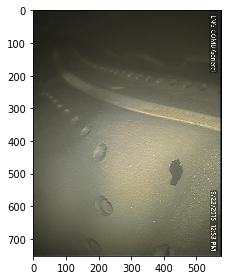

In [11]:

img = coco.loadImgs(imgIds[i])[0]
print(img['id'])
IMAGE = imread(img['file_name'])
images.append(img)
catIds=[]
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns_segment = coco.loadAnns(annIds)
print(anns_segment)
hgt = IMAGE.shape[0]
wid = IMAGE.shape[1]
print(wid,hgt)
imshow(IMAGE)

288 376
376 288


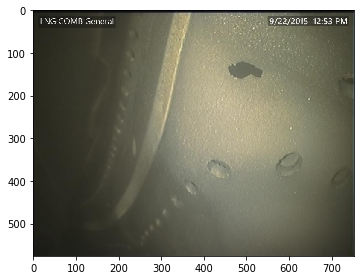

In [12]:
angle1=-90
(cX, cY) = (wid // 2, hgt // 2)
print(cX,cY) #  center points of original image

# rotate our image around the image
M = cv2.getRotationMatrix2D((cX, cY), angle1, 1.0)
rotated = cv2.warpAffine(IMAGE, M, (wid, hgt))
# entire rotated image still views in the viewing area
rotated = imutils.rotate_bound(IMAGE,angle1)
imshow(rotated)
debug_image = rotated.copy()


(h1, w1) = IMAGE.shape[:2]
(h, w) = rotated.shape[:2]
(cX1, cY1) = (w1 // 2, h1 // 2)
#print(cX1,cY1) #original center points
(cX, cY) = (w // 2, h // 2)
print(cX,cY) #rotated center points

In [13]:

for id, ann in enumerate(anns_segment):
    print(id,ann)

0 {'segmentation': [[435, 540, 431, 539, 426, 537, 420, 536, 417, 535, 417, 529, 419, 524, 424, 512, 425, 509, 419, 495, 416, 486, 418, 479, 421, 471, 422, 466, 423, 461, 425, 457, 431, 457, 434, 457, 440, 453, 445, 453, 448, 459, 451, 463, 453, 467, 448, 473, 453, 476, 457, 483, 458, 488, 458, 495, 455, 501, 453, 507, 444, 523, 441, 534, 439, 537]], 'area': 3654, 'bbox': [416, 453, 42, 87], 'iscrowd': 0, 'id': 1, 'image_id': 1, 'category_id': 3}


In [14]:
print(ann['image_id'],imgIds[i])

1 1


In [15]:
segmnt_val = ann["segmentation"]

for val in segmnt_val:

    r_axis = val
print(r_axis)

[435, 540, 431, 539, 426, 537, 420, 536, 417, 535, 417, 529, 419, 524, 424, 512, 425, 509, 419, 495, 416, 486, 418, 479, 421, 471, 422, 466, 423, 461, 425, 457, 431, 457, 434, 457, 440, 453, 445, 453, 448, 459, 451, 463, 453, 467, 448, 473, 453, 476, 457, 483, 458, 488, 458, 495, 455, 501, 453, 507, 444, 523, 441, 534, 439, 537]


In [16]:
org_pts=r_axis.copy()
org_pts=np.array(org_pts)
org_pts=org_pts.reshape((-1,1,2))

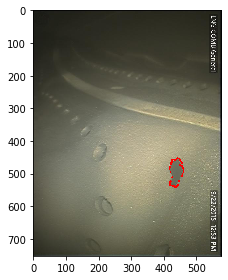

In [17]:
isClosed = True
# Green color in BGR
color = (255, 0, 0)
thickness = 5
img_poly= cv2.polylines(IMAGE, org_pts, isClosed, color, thickness) 
imshow(img_poly)


In [18]:
for val in segmnt_val:

    r_axis = val   

    for k in range(0, len(r_axis), 2):

        angle = math.radians(angle1)
        temp_point = r_axis[k] - cX1, r_axis[k+1] - cY1
        temp_point = (temp_point[0]*math.cos(angle)-temp_point[1]*math.sin(angle) , temp_point[0]*math.sin(angle)+temp_point[1]*math.cos(angle))
        temp_point = temp_point[0]+cX, temp_point[1]+cY

        r_axis[k] =  int(temp_point[0])
        r_axis[k+1] = int(temp_point[1])

        pts = np.array(r_axis, np.int32)
print(pts)

[540 141 539 145 537 150 536 156 535 159 529 159 524 157 512 152 509 151
 495 157 486 160 479 158 471 155 466 154 461 153 457 151 457 145 457 142
 453 136 453 131 459 128 463 125 467 123 473 128 476 123 483 119 488 118
 495 118 501 121 507 123 523 132 534 135 537 137]


In [19]:


pts = pts.reshape((-1, 1, 2))

isClosed = True
# Green color in BGR
color = (255, 0, 0)
thickness = 5

print("NEW Polygon : ",r_axis )



NEW Polygon :  [540, 141, 539, 145, 537, 150, 536, 156, 535, 159, 529, 159, 524, 157, 512, 152, 509, 151, 495, 157, 486, 160, 479, 158, 471, 155, 466, 154, 461, 153, 457, 151, 457, 145, 457, 142, 453, 136, 453, 131, 459, 128, 463, 125, 467, 123, 473, 128, 476, 123, 483, 119, 488, 118, 495, 118, 501, 121, 507, 123, 523, 132, 534, 135, 537, 137]


[[540, 141, 539, 145, 537, 150, 536, 156, 535, 159, 529, 159, 524, 157, 512, 152, 509, 151, 495, 157, 486, 160, 479, 158, 471, 155, 466, 154, 461, 153, 457, 151, 457, 145, 457, 142, 453, 136, 453, 131, 459, 128, 463, 125, 467, 123, 473, 128, 476, 123, 483, 119, 488, 118, 495, 118, 501, 121, 507, 123, 523, 132, 534, 135, 537, 137]]


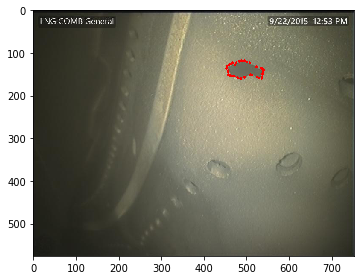

In [20]:
debug_image = cv2.polylines(debug_image, pts, isClosed, color, thickness)  
imshow(debug_image)
segments = []
segments.append(r_axis)
print(segments)

In [21]:
rect = cv2.boundingRect(pts) #creating bounding box from the rotating polygon points
    
print("NEW BBOX : ",rect )

color = (0, 255,255) 
thickness = 3

start_point = (rect[0], rect[1]) 
end_point = (rect[0]+rect[2], rect[1]+rect[3])

debug_image = cv2.rectangle(debug_image, start_point, end_point, color, thickness)

NEW BBOX :  (453, 118, 88, 43)


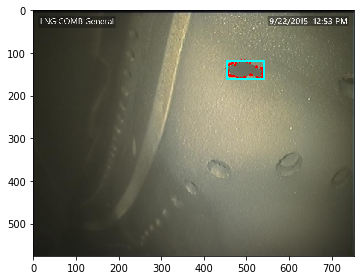

In [22]:
imshow(debug_image)

In [23]:
head1, tail1 = os.path.split(img['file_name'])
image_name1 = tail1 

In [24]:
tail1

'LNG_COMB_General007.JPG'

In [25]:
file_name = destination_path_images+'/'+image_name1
plt.imsave(file_name, rotated)

In [26]:
ori_pil =Image.open(img['file_name']) # original pic
rotate_pil =Image.open(file_name)  # rotated pic
masked_pil = Image.fromarray(debug_image) # masked pic

In [27]:
new_image = Image.new('RGB',(3*max(ori_pil.size[0], rotate_pil.size[0], masked_pil.size[0]),max(ori_pil.size[1], rotate_pil.size[1], masked_pil.size[1])), (250,250,250))
new_image.paste(ori_pil,(0,0))
new_image.paste(rotate_pil,(ori_pil.size[0],0))
new_image.paste(masked_pil,(rotate_pil.size[0]+ori_pil.size[0],0))

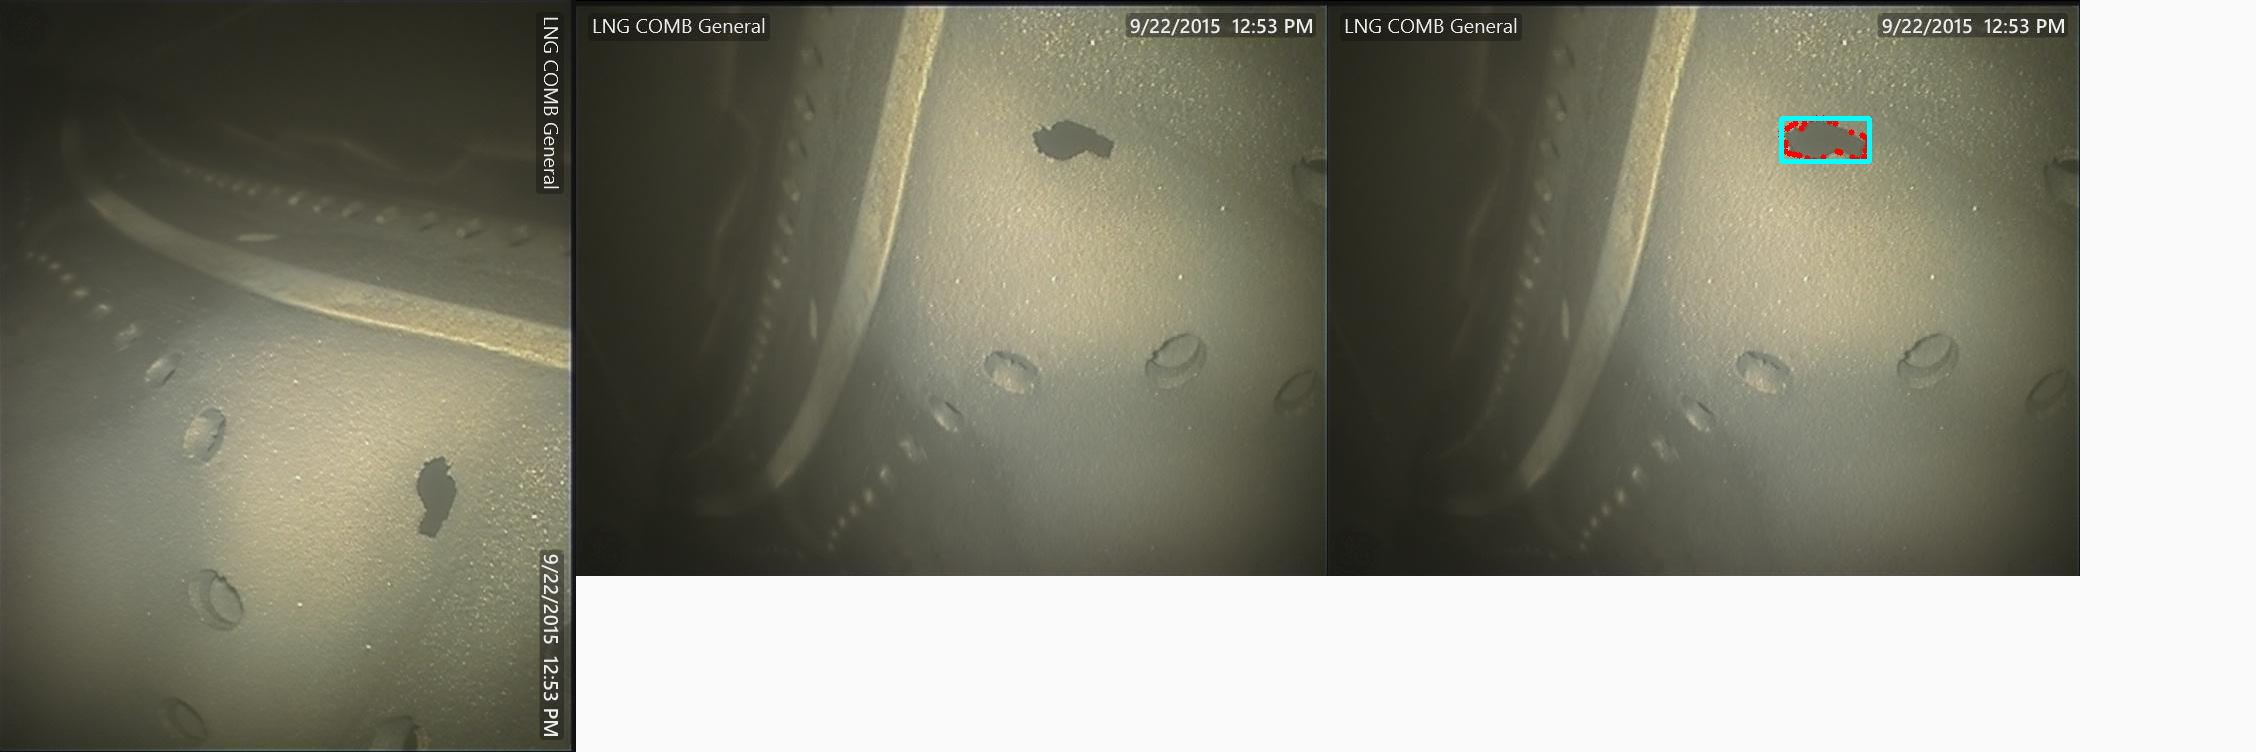

In [28]:
new_image

In [29]:
new_image.save(destination_path_rotations+'/'+image_name1,"JPEG")

In [35]:

images.append(img)

In [36]:
images

[{'id': 1,
  'width': 576,
  'height': 752,
  'file_name': '/data/cv_inspection_repair/training-files/tmp/images/LNG_COMB_General007.JPG',
  'license': 0,
  'flickr_url': 'http://10.79.85.55:8089/data/New_Combustors_Condition-selected_FINAL/Level1-677-190_FINAL/LNG_COMB_General007.JPG',
  'coco_url': 'http://10.79.85.55:8089/data/New_Combustors_Condition-selected_FINAL/Level1-677-190_FINAL/LNG_COMB_General007.JPG',
  'date_captured': ''}]

In [32]:
rotate_annos.append({"segmentation" : segments,
                    "area" : rect[2]*rect[3],
                    "bbox" : list(rect),
                    "iscrowd" : ann['iscrowd'],
                    "id": ann['id'],
                    "image_id" : ann['image_id'],
                    "category_id" : ann['category_id']})

In [38]:
rotated_data_1['images']=images

In [39]:
rotated_data_1['infos'] = coco.dataset['infos']
rotated_data_1['images'][i]['file_name'] = file_name
rotated_data_1['images'][i]['width'] = rotated.shape[1]
rotated_data_1['images'][i]['height'] = rotated.shape[0]
#rotated_data_1['images'][i]['file_name'] = file_name
rotated_data_1['annotations'] = rotate_annos
rotated_data_1['licenses'] = coco.dataset['licenses']
cats = coco.loadCats(coco.getCatIds())       
rotated_data_1['categories'] = cats


In [40]:
rotated_data_1

{'infos': {'year': 2021,
  'version': '1.0',
  'description': '',
  'contributor': '',
  'url': '',
  'date_created': 'Wed Jun 23 10:56:50 2021'},
 'images': [{'id': 1,
   'width': 752,
   'height': 576,
   'file_name': '/workspace/malathi/Annotation_task/Annotation/ROTATE/Rotated_images/LNG_COMB_General007.JPG',
   'license': 0,
   'flickr_url': 'http://10.79.85.55:8089/data/New_Combustors_Condition-selected_FINAL/Level1-677-190_FINAL/LNG_COMB_General007.JPG',
   'coco_url': 'http://10.79.85.55:8089/data/New_Combustors_Condition-selected_FINAL/Level1-677-190_FINAL/LNG_COMB_General007.JPG',
   'date_captured': ''}],
 'annotations': [{'segmentation': [[540,
     141,
     539,
     145,
     537,
     150,
     536,
     156,
     535,
     159,
     529,
     159,
     524,
     157,
     512,
     152,
     509,
     151,
     495,
     157,
     486,
     160,
     479,
     158,
     471,
     155,
     466,
     154,
     461,
     153,
     457,
     151,
     457,
     145,
     

In [41]:
rotate_angle=angle1
json.dump(rotated_data_1,open(destination_path_annotations+str(rotate_angle)+'.json','w'))

#print('------------------------------------------------------------')

In [ ]:
destination_path_images = destination+'/Rotated_images'
destination_path_annotations = destination+'/Annotation_json'
destination_path_rotations = destination+'/Validation_images'

In [ ]:
#ignore these cells